In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
rides = pd.read_csv('Bike-Sharing_hour_data.csv')

In [4]:
rides.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [5]:
rides.shape

(17379, 17)

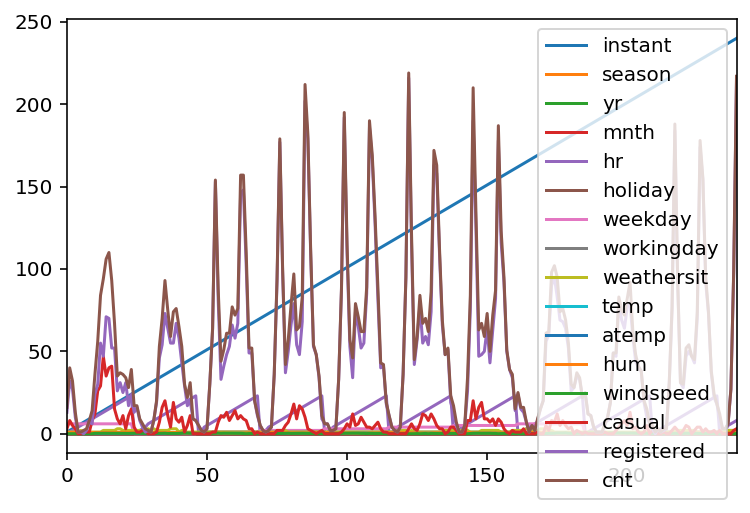

In [6]:
rides[:24*10].plot()
plt.show()

In [7]:
# Dummy variables
dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(rides[each], prefix=each, drop_first=False)
    rides = pd.concat([rides, dummies], axis=1)

fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr']
data = rides.drop(fields_to_drop, axis=1)
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
# Feature Scaling
quant_features = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std

In [9]:
scaled_features

{'casual': [35.67621842453536, 49.305030387053186],
 'registered': [153.78686920996606, 151.35728591258317],
 'cnt': [189.46308763450142, 181.38759909186527],
 'temp': [0.4969871684216586, 0.19255612124972407],
 'hum': [0.6272288394038822, 0.1929298340629125],
 'windspeed': [0.1900976063064631, 0.12234022857279413]}

In [10]:
# Save data for approximately the last 21 days 
test_data = data[-21*24:]

# Now remove the test data from the data set 
data = data[:-21*24]

# Separate the data into features and targets
target_fields = ['cnt', 'casual', 'registered']
features, targets = data.drop(target_fields, axis=1), data[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]

In [11]:
# Hold out the last 60 days or so of the remaining data as a validation set
train_features, train_targets = features[:-60*24], targets[:-60*24]
val_features, val_targets = features[-60*24:], targets[-60*24:]

In [12]:
val_features.shape

(1440, 56)

In [13]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

# create model
model = Sequential()
model.add(Dense(50, input_dim=train_features.shape[1], kernel_initializer='normal', activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer='normal'))

Using TensorFlow backend.
W0910 16:44:41.667422 139828083898112 deprecation_wrapper.py:119] From /home/anon/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0910 16:44:41.684879 139828083898112 deprecation_wrapper.py:119] From /home/anon/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0910 16:44:41.686941 139828083898112 deprecation_wrapper.py:119] From /home/anon/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0910 16:44:41.713110 139828083898112 deprecation_wrapper.py:119] From /home/anon/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.place

In [14]:
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])

W0910 16:44:41.784709 139828083898112 deprecation_wrapper.py:119] From /home/anon/.local/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                2850      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 2,901
Trainable params: 2,901
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(x=train_features.values, y=train_targets['cnt'].values, batch_size=250, epochs=100,
          validation_data=[val_features.values, val_targets['cnt'].values])

W0910 16:44:42.161137 139828083898112 deprecation_wrapper.py:119] From /home/anon/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 15435 samples, validate on 1440 samples
Epoch 1/100
15435/15435 [==============================] - 0s 24us/step - loss: 0.9219 - acc: 0.0000e+00 - val_loss: 1.2862 - val_acc: 0.0000e+00
Epoch 2/100
15435/15435 [==============================] - 0s 9us/step - loss: 0.7616 - acc: 0.0000e+00 - val_loss: 1.1178 - val_acc: 0.0000e+00
Epoch 3/100
15435/15435 [==============================] - 0s 10us/step - loss: 0.6091 - acc: 0.0000e+00 - val_loss: 0.8924 - val_acc: 0.0000e+00
Epoch 4/100
15435/15435 [==============================] - 0s 8us/step - loss: 0.5141 - acc: 0.0000e+00 - val_loss: 0.7451 - val_acc: 0.0000e+00
Epoch 5/100
15435/15435 [==============================] - 0s 9us/step - loss: 0.4615 - acc: 0.0000e+00 - val_loss: 0.6421 - val_acc: 0.0000e+00
Epoch 6/100
15435/15435 [==============================] - 0s 11us/step - loss: 0.4200 - acc: 0.0000e+00 - val_loss: 0.5809 - val_acc: 0.0000e+00
Epoch 7/100
15435/15435 [==============================] - 0s 10us/step - loss

Epoch 57/100
15435/15435 [==============================] - 0s 9us/step - loss: 0.1993 - acc: 0.0000e+00 - val_loss: 0.3153 - val_acc: 0.0000e+00
Epoch 58/100
15435/15435 [==============================] - 0s 7us/step - loss: 0.1936 - acc: 0.0000e+00 - val_loss: 0.3084 - val_acc: 0.0000e+00
Epoch 59/100
15435/15435 [==============================] - 0s 8us/step - loss: 0.1903 - acc: 0.0000e+00 - val_loss: 0.3019 - val_acc: 0.0000e+00
Epoch 60/100
15435/15435 [==============================] - 0s 8us/step - loss: 0.1862 - acc: 0.0000e+00 - val_loss: 0.2983 - val_acc: 0.0000e+00
Epoch 61/100
15435/15435 [==============================] - 0s 8us/step - loss: 0.1823 - acc: 0.0000e+00 - val_loss: 0.2906 - val_acc: 0.0000e+00
Epoch 62/100
15435/15435 [==============================] - 0s 9us/step - loss: 0.1774 - acc: 0.0000e+00 - val_loss: 0.2845 - val_acc: 0.0000e+00
Epoch 63/100
15435/15435 [==============================] - 0s 18us/step - loss: 0.1741 - acc: 0.0000e+00 - val_loss: 0.2791

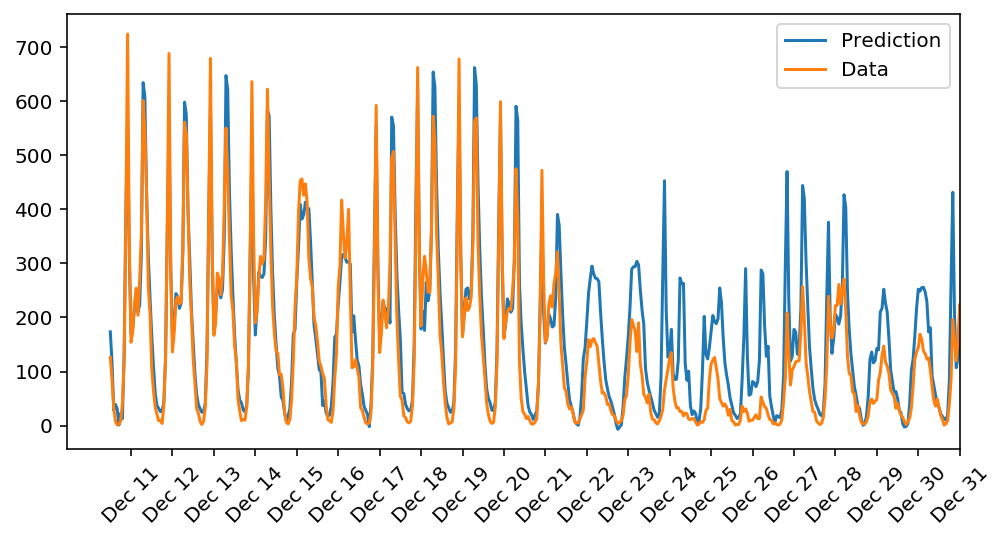

In [17]:
fig, ax = plt.subplots(figsize=(8,4))

mean, std = scaled_features['cnt']
#predictions = network.run(test_features).T*std + mean
predictions = model.predict(test_features.values).T*std + mean
ax.plot(predictions[0], label='Prediction')
ax.plot((test_targets['cnt']*std + mean).values, label='Data')
ax.set_xlim(right=len(predictions))
ax.legend()

dates = pd.to_datetime(rides.iloc[test_data.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)